<a href="https://colab.research.google.com/github/gauravvxv/cafe-sales/blob/main/notebook/cafe_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧼 Cafe Sales Data Cleaning Project









# 📌 1. Introduction

In this project, I worked with a messy cafe sales dataset. My goal was to clean the data and explore it using visualizations with Matplotlib and Seaborn. This helped me understand sales patterns, product performance, and prepare the data for future analysis.

# 📥 2. Import libraries

We import necessary libraries for data handling and visualization:

*   `pandas` and `numpy` for data manipulation
*   `matplotlib` and `seaborn` for data visualization



In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 📂 3. Load Dataset
We load the dataset using Pandas and display the first few rows to understand the structure.



In [5]:
path = '/content/drive/MyDrive'

In [7]:
data = pd.read_csv(path+'/dirty_cafe_sales.csv')

In [8]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


# 🧐 4. Initial Data Exploration

## We explore the dataset using basic functions like `.info()`, `.describe()`, `.shape`, and check for missing or duplicate values. This helps us spot initial problems in the data.

In [15]:
data.shape

(10000, 8)

In [16]:
data.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [18]:
data.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [19]:
data.dtypes

,0
Transaction ID,object
Item,object
Quantity,object
Price Per Unit,object
Total Spent,object
Payment Method,object
Location,object
Transaction Date,object


In [20]:
data.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,159


## After exploring the dataset, it was found that there are 10,000 rows and 8 columns.

* Except for the Transaction ID column, all other columns contain null (missing) values, indicating significant data quality issues.

* Additionally, the column names start with uppercase letters and contain spaces (e.g., "Price Per Unit", "Payment Method").
This format is not ideal for programmatic analysis in Python.

**These issues will be addressed during the data cleaning phase by:**

* Handling or imputing missing values appropriately

* Renaming columns to follow a consistent, Pythonic naming style using snake_case (e.g., "price_per_unit", "payment_method")

# 🧹 5. Data Cleaning

## **Column Name Modifying**

*   All column names were converted to the lower case using `.str.lower()`
*   Spaces were replaced with underscores using `.str.replace(' ','_')`



In [24]:
data.columns = data.columns.str.lower().str.replace(' ','_')

In [21]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


## **Handling missing values in item column**



* The NaN values in the item column were filled with the placeholder `Unknown` to preserve the rows while indicating missing data.

* Any items that were in uppercase were converted to the title case using `.str.title()`

In [75]:
data['item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Unknown',
       'Sandwich', 'Juice', 'Tea'], dtype=object)

In [74]:
data['item'].fillna('Unknown',inplace=True)
data['item'] = data['item'].replace(['Error','error','ERROR'],'Unknown')

<ipython-input-74-ecbfc8381549>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['item'].fillna('Unknown',inplace=True)


In [26]:
data['item'] = data['item'].str.title()

In [27]:
data['item']

,item
0,Coffee
1,Cake
2,Cookie
3,Salad
4,Coffee
...,...
9995,Coffee
9996,Unknown
9997,Coffee
9998,Cookie


## **Handling missing values in quantity, price_per_unit and total_spend column**


* The columns quantity, price_per_unit, and total_spent initially had a data type of object, likely due to the presence of non-numeric entries (e.g., strings or errors).
*  To perform numerical operations and handle missing values accurately, all three columns were converted to float using pd.to_numeric() with errors='coerce'.





In [29]:
data['quantity'] = pd.to_numeric(data['quantity'],errors='coerce')

In [30]:
data['total_spent'] = pd.to_numeric(data['total_spent'],errors='coerce')

In [31]:
data['price_per_unit'] = pd.to_numeric(data['price_per_unit'],errors='coerce')

In [32]:
data.dtypes

,0
transaction_id,object
item,object
quantity,float64
price_per_unit,float64
total_spent,float64
payment_method,object
location,object
transaction_date,object


In [35]:
data['quantity'].fillna(data['quantity'].median(),inplace=True)

<ipython-input-35-36aefdef1b19>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['quantity'].fillna(data['quantity'].median(),inplace=True)


In [36]:
data['price_per_unit'].fillna(data['price_per_unit'].median(),inplace=True)

<ipython-input-36-f51e345c6cd6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['price_per_unit'].fillna(data['price_per_unit'].median(),inplace=True)


In [37]:
data['total_spent'].fillna(data['quantity'] * data['price_per_unit'],inplace=True)

<ipython-input-37-71b37bc5b6da>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_spent'].fillna(data['quantity'] * data['price_per_unit'],inplace=True)


## **Handling Missing values in payment_method**

* Fill with the most frequent value using `mode()`

In [55]:
data['payment_method'] = data['payment_method'].replace(['UNKNOWN','Unknown','ERROR','Error'],'Unknown')

In [56]:
mode_payment = data['payment_method'].mode()[0]

data['payment_method'].fillna(mode_payment,inplace=True)

<ipython-input-56-1638a772a9eb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['payment_method'].fillna(mode_payment,inplace=True)


## **Handling the missing values in location column**

* Filling all missing values with most frequent using `mode`

In [86]:
location_data = data.loc[data['location']!='Unknown','location'].mode()[0]
data['location'] = data['location'].replace('Unknown',location_data)

## **Handling Missing Values in transaction_date Column**

* Convert valid date string into datetime
* fill missing values with the median or most frequent date

In [45]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'],errors='coerce')

In [47]:
most_common_date = data['transaction_date'].mode()[0]
data['transaction_date'].fillna(most_common_date,inplace=True)

<ipython-input-47-9357f0e950c4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['transaction_date'].fillna(most_common_date,inplace=True)


In [138]:
data.head()

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date,month
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,2023-09
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,2023-05
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,2023-07
3,TXN_7034554,Salad,2.0,5.0,10.0,Credit Card,Takeaway,2023-04-27,2023-04
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,2023-06


## **Creating new column name month**

In [137]:
data["month"] = data['transaction_date'].dt.to_period('M').astype(str)

## **Ensuring All Missing Values Are Handled**

In [88]:
data.isnull().sum()

,0
transaction_id,0
item,0
quantity,0
price_per_unit,0
total_spent,0
payment_method,0
location,0
transaction_date,0


# 💾 6. Export Cleaned Data

* After completing all cleaning steps, I saved the cleaned dataset to a new CSV file for future use and analysis.**

In [142]:
data.to_csv('/content/drive/MyDrive/cleaned_cafe_sales.csv',index=False)

# 📊 7. Exploratory Data Analysis (EDA)

## **Total Daily Sales**

In [114]:
daily_sales = data.groupby('transaction_date')['total_spent'].sum()

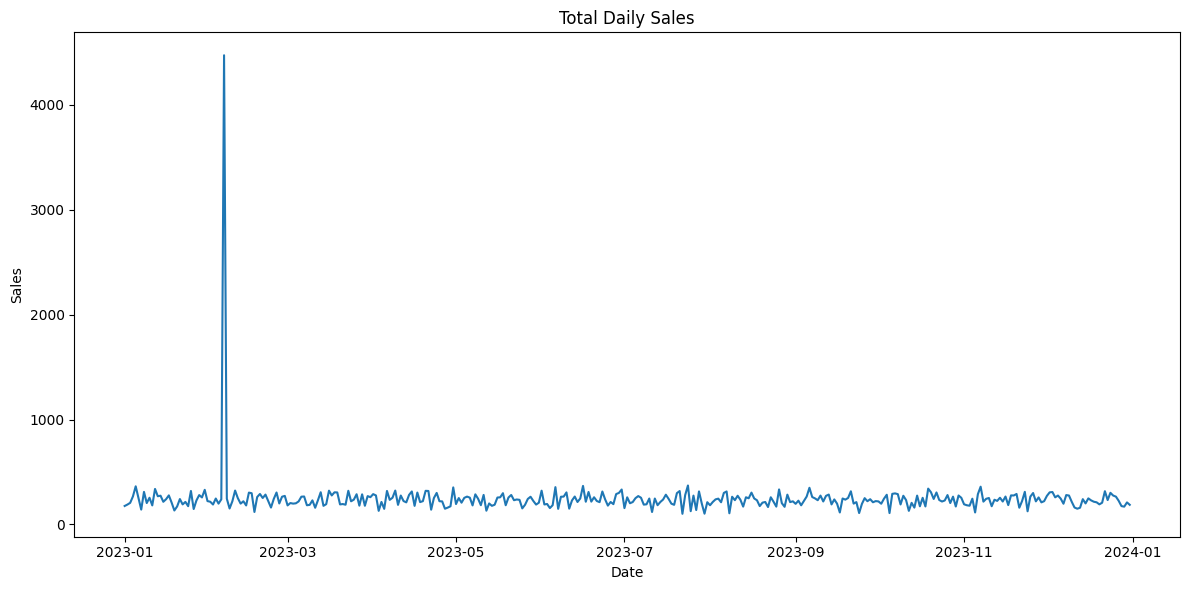

In [111]:
plt.figure(figsize=(12,6))
sns.lineplot(data = daily_sales)
plt.title("Total Daily Sales")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

## **Monthly Sales**

In [139]:
monthly_data = data.groupby('month')['total_spent'].sum()

Text(0, 0.5, 'Sales')

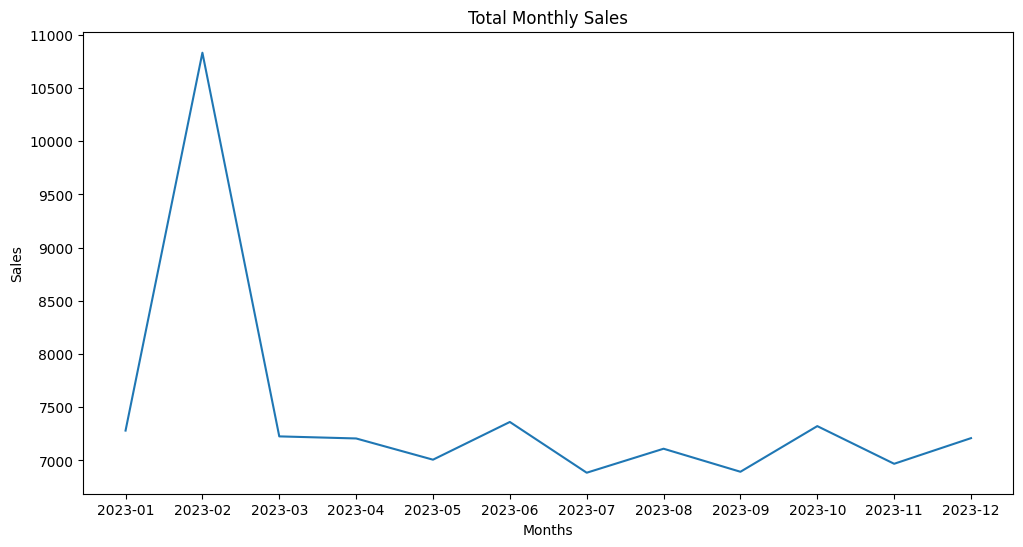

In [140]:
plt.figure(figsize=(12,6))
sns.lineplot(data = monthly_data)
plt.title('Total Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Sales')

## **Product-wise Sales**


In [129]:
top_selling = data.groupby('item')['total_spent'].sum()

Text(0.5, 0, 'All Items')

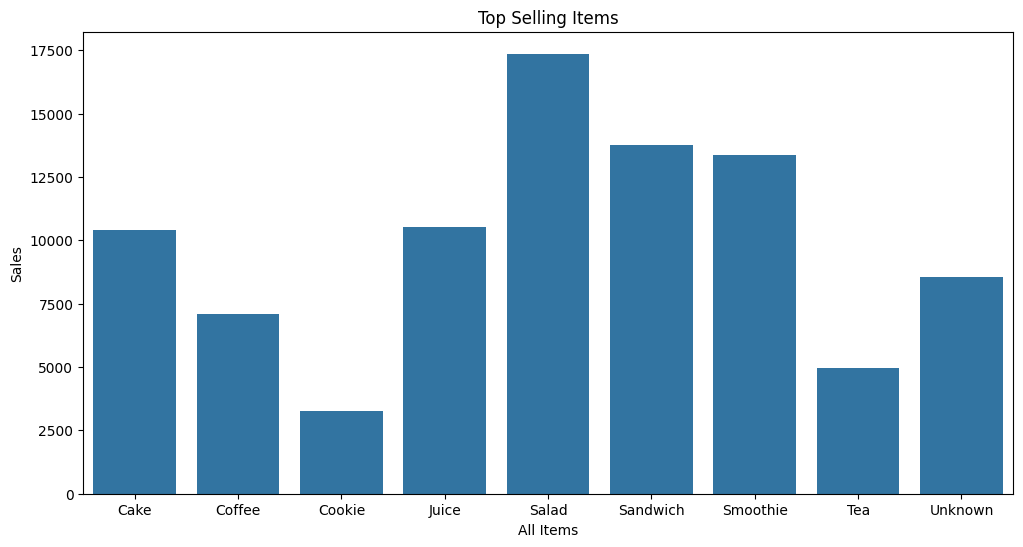

In [132]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_selling)
plt.title('Top Selling Items')
plt.ylabel('Sales')
plt.xlabel('All Items')

# 🧾 7. Summary & Key Insights



*  ✅ Cleaned the dataset by handling missing values and correcting column names for consistency and readability.
*  🧹 Ensured proper data types, especially converting the transaction_date column to datetime format for time-based operations.
* 🧱 Created a new column month in YYYY-MM format using the transaction date, which enables effective monthly grouping and analysis.
* 📈 Visualized total sales on a daily and monthly basis using line plots to understand overall sales performance.
* 🛍️ Identified top-performing products through bar charts, highlighting items that contribute the most to revenue.

